<a href="https://colab.research.google.com/github/oedjab/PVCK_smster3/blob/main/minggu2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 150


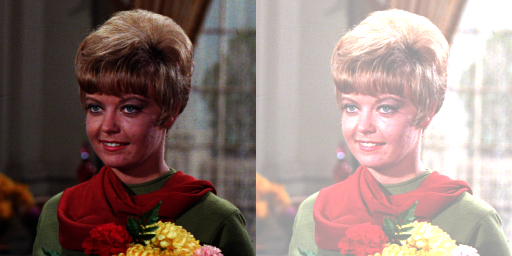

In [28]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
#for y in range(original.shape[0]):
#  for x in range(original.shape[1]):
#    for c in range(original.shape[2]):
#      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
brightness_image = cv.convertScaleAbs(original, beta= brightness, alpha=1)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

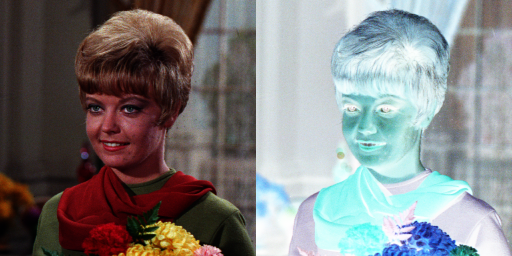

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Cek apakah gambar berhasil dimuat
if original is None:
    print("Error: Gambar tidak ditemukan atau gagal dimuat.")
    exit()  # Keluar dari program jika gambar tidak ditemukan

# Melakukan inversi gambar
inverted_image = 255 - original

# Menampilkan gambar asli dan hasil inversi
#cv2_imshow(original)       # Gambar asli
#cv2_imshow(inverted_image) # Gambar hasil inversi

combined_image = cv.hconcat((original, inverted_image))
cv2_imshow(combined_image)


Masukkan nilai kontras (a): 5
Masukkan nilai brightness (b): 1


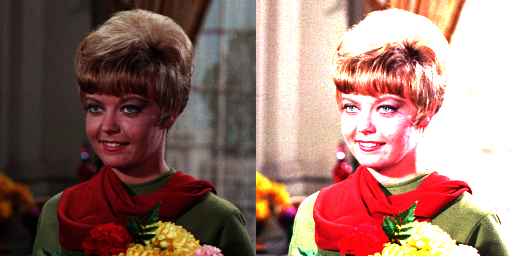

In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Cek apakah gambar berhasil dimuat
if original is None:
    print("Error: Gambar tidak ditemukan atau gagal dimuat.")
    exit()

# Input nilai kontras dan brightness dari pengguna
a = float(input("Masukkan nilai kontras (a): "))  # Contoh: 1.5 untuk meningkatkan kontras
b = int(input("Masukkan nilai brightness (b): ")) # Contoh: 50 untuk menambah kecerahan

# Mengubah kontras dan brightness dengan rumus g(x,y) = a*f(x,y) + b
adjusted_image = np.clip(a * original + b, 0, 255).astype(np.uint8)

# Menampilkan gambar asli dan hasil perubahan kontras
combined_image = cv.hconcat([original, adjusted_image])
cv2_imshow(combined_image)


Masukkan nilai c: 25


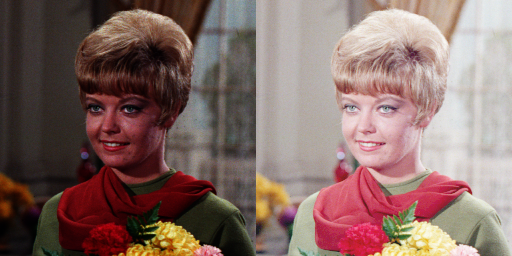

In [27]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar dalam grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Cek apakah gambar berhasil dimuat
if original is None:
    print("Error: Gambar tidak ditemukan atau gagal dimuat.")
    exit()

# Input nilai konstanta c dari pengguna
c = float(input("Masukkan nilai c: "))  # Contoh: 30

# Ubah tipe data ke float untuk menghindari pembulatan integer
original_float = original.astype(np.float32)

# Transformasi logarithmic brightness
log_transformed = c * np.log1p(original_float)  # log1p(x) = log(1 + x), lebih stabil

# Normalisasi kembali ke rentang 0-255 agar bisa ditampilkan dengan OpenCV
#log_transformed = cv.normalize(log_transformed, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
log_transformed = np.clip(log_transformed * 255 / np.max(log_transformed), 0, 255).astype(np.uint8)

# Menampilkan gambar asli dan hasil transformasi
combined_image = cv.hconcat([original, log_transformed])
cv2_imshow(combined_image)


AVERAGE :


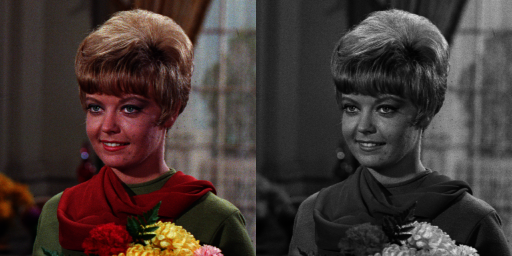

LIGHTNESS :


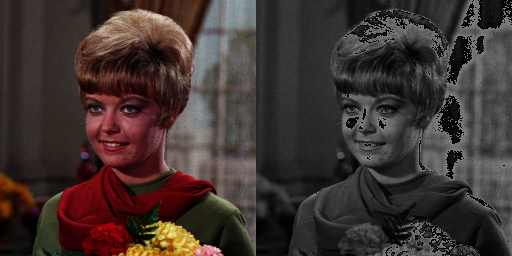

LUMINANCE :


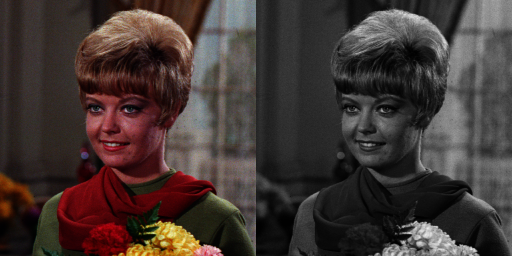

In [39]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar dalam format warna (BGR)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Cek apakah gambar berhasil dimuat
if original is None:
    print("Error: Gambar tidak ditemukan atau gagal dimuat.")
    exit()

# Konversi ke grayscale dengan metode rata-rata
grayscale = np.mean(original, axis=2).astype(np.uint8)

# Menampilkan gambar asli dan hasil grayscale
combined_image = cv.hconcat([original, cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR)])
print("AVERAGE :")
cv2_imshow(combined_image)


# Mengambil nilai maksimum dan minimum dari setiap piksel RGB
max_rgb = np.max(original, axis=2)  # Nilai maksimum dari R, G, B
min_rgb = np.min(original, axis=2)  # Nilai minimum dari R, G, B

# Menghitung grayscale dengan metode Lightness
grayscale1 = ((max_rgb + min_rgb) / 2).astype(np.uint8)

combined_image1 = cv.hconcat([original, cv.cvtColor(grayscale1, cv.COLOR_GRAY2BGR)])
print("LIGHTNESS :")
cv2_imshow(combined_image1)


# Ekstrak kanal warna BGR
B, G, R = cv.split(original)

# Menghitung grayscale dengan metode Luminance
grayscale2 = (0.210 * R + 0.720 * G + 0.070 * B).astype(np.uint8)

# Menampilkan gambar asli dan hasil grayscale
combined_image2 = cv.hconcat([original, cv.cvtColor(grayscale2, cv.COLOR_GRAY2BGR)])
print("LUMINANCE :")
cv2_imshow(combined_image2)


Pilih warna (R/G/B): b


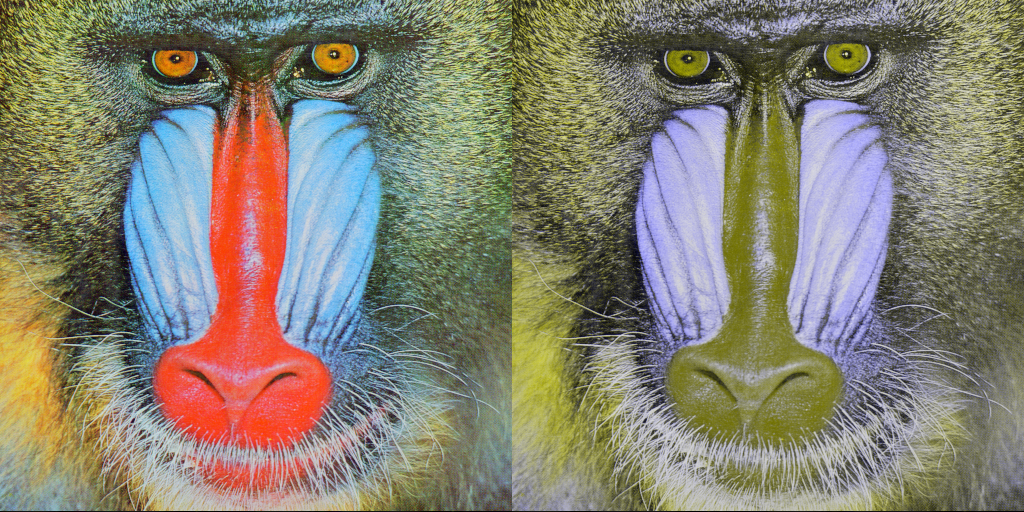

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar dalam format warna (BGR)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

# Cek apakah gambar berhasil dimuat
if original is None:
    print("Error: Gambar tidak ditemukan atau gagal dimuat.")
    exit()

# Konversi gambar ke grayscale
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Memisahkan channel warna (BGR)
B, G, R = cv.split(original)

# Pilihan warna yang tersedia
color_choice = input("Pilih warna (R/G/B): ").strip().upper()

# Membuat gambar baru dengan warna tertentu dipertahankan
if color_choice == 'R':
    selected_channel = R
elif color_choice == 'G':
    selected_channel = G
elif color_choice == 'B':
    selected_channel = B
else:
    print("Pilihan warna tidak valid! Pilih antara R, G, atau B.")
    exit()

# Buat mask untuk mempertahankan warna tertentu
mask = cv.merge([B if color_choice == 'B' else gray,
                 G if color_choice == 'G' else gray,
                 R if color_choice == 'R' else gray])

# Menampilkan gambar asli dan hasil
combined_image = cv.hconcat([original, mask])
cv2_imshow(combined_image)


Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale
Masukkan warna yang ingin ditampilkan/pertahankan (misal: biru, hijau, merah): hijau


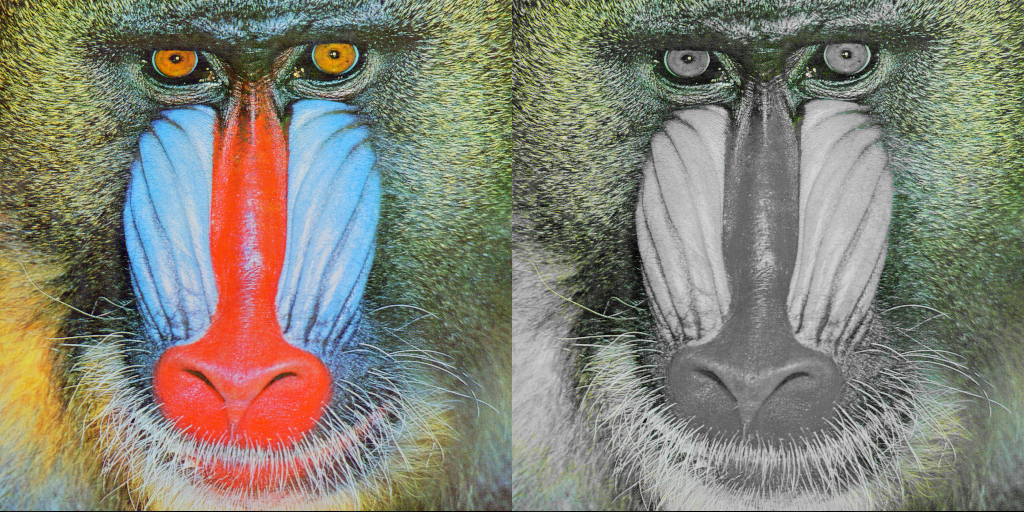

In [7]:
import cv2
import numpy as np

print('Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale')
print('=============================================================================')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
grayscale_image = np.zeros(original.shape, original.dtype)
gambar1 = np.zeros(original.shape, original.dtype)

# Minta pengguna memasukkan warna yang ingin ditampilkan (misal: biru)
pilihan = input('Masukkan warna yang ingin ditampilkan/pertahankan (misal: biru, hijau, merah): ')

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        # Mengambil Nilai RGB untuk setiap pixel
        b, g, r = original[y, x]

        # Menghitung nilai luminance dari Nilai RGB
        luminance = 0.21*r + 0.72*g + 0.07*b

        # Memasukkan nilai luminance
        if pilihan.lower() == 'biru' and b > g and b > r:
            grayscale_image[y, x] = [b, g, r]
        elif pilihan.lower() == 'hijau' and g > b and g > r:
            grayscale_image[y, x] = [b, g, r]
        elif pilihan.lower() == 'merah' and r > b and r > g:
            grayscale_image[y, x] = [b, g, r]
        else:
            grayscale_image[y, x] = [luminance, luminance, luminance]

final_frame = cv2.hconcat((original, grayscale_image))
cv2_imshow(final_frame)